In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_stata('wgidataset.dta') # Read WorldGovernence Metrics.Data is in STATA formt.

In [3]:
len(df)

4708

In [4]:
df.head()

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
0,ABW,Aruba,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Select data for those yeras for Which we have Happiness Data
df=df[df['year'].isin([2015,2016,2017,2018,2019,2020])]
len(df)

1284

In [7]:
df.columns

Index(['code', 'countryname', 'year', 'vae', 'vas', 'van', 'var', 'val', 'vau',
       'pve', 'pvs', 'pvn', 'pvr', 'pvl', 'pvu', 'gee', 'ges', 'gen', 'ger',
       'gel', 'geu', 'rqe', 'rqs', 'rqn', 'rqr', 'rql', 'rqu', 'rle', 'rls',
       'rln', 'rlr', 'rll', 'rlu', 'cce', 'ccs', 'ccn', 'ccr', 'ccl', 'ccu'],
      dtype='object')

In [8]:
# Select Country code,name, year and various types of ranks.
df=df[['code', 'countryname', 'year','var','pvr','ger','rqr','rlr','ccr']] 

In [9]:
df.reset_index(inplace=True,drop=True) #Reset Index and Drop the columns
df.head()

,code,countryname,year,var,pvr,ger,rqr,rlr,ccr
0,ABW,Aruba,2015,91.625618,93.333336,76.442307,90.384613,85.576920,88.942307
1,ABW,Aruba,2016,92.118225,94.285713,76.923080,88.942307,87.019234,89.423080
2,ABW,Aruba,2017,92.610840,95.714287,78.365387,84.134613,87.019234,88.461540
3,ABW,Aruba,2018,90.821259,95.754715,80.288460,77.884613,87.019234,87.019234
4,ABW,Aruba,2019,91.787437,95.754715,80.288460,75.961540,86.538460,85.576920


In [6]:
#Read Happiness Data
HappinessData=pd.read_excel('WHRDATA\WHR2015-21.xlsx')

In [15]:
#Get unique country names
HappinessData['Country'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kosov

In [7]:
#Get unique country names
df['countryname'].sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'French 

In [8]:
#Clean up Country names in Governance Data as per County names in Happiness Data

In [9]:
df.replace('Congo, Rep.','Congo (Brazzaville)',inplace=True)

In [10]:
df.replace('Congo, Dem. Rep.','Congo (Kinshasa)',inplace=True)

In [11]:
df.replace('Hong Kong SAR, China','Hong Kong',inplace=True)

In [12]:
df.replace('Iran, Islamic Rep.','Iran',inplace=True)

In [13]:
df.replace('Korea, Rep.','South Korea',inplace=True)

In [14]:
df.replace('Lao PDR','Laos',inplace=True)

In [15]:
df.replace('Macao SAR, China','Hong Kong',inplace=True)

In [16]:
df.replace('Russian Federation','Russia',inplace=True)

In [17]:
df.replace('Yemen, Rep.','Yemen',inplace=True)

In [18]:
df.replace('West Bank and Gaza','Palestinian Territories',inplace=True)

In [19]:
df.head()

,code,countryname,year,vae,vas,van,var,val,vau,pve,...,rln,rlr,rll,rlu,cce,ccs,ccn,ccr,ccl,ccu
16,ABW,Aruba,2015,1.273942,0.276420,1.0,91.625618,72.413795,100.000000,1.230921,...,3.0,85.576920,77.403847,91.346153,1.297560,0.290631,2.0,88.942307,76.923080,92.788460
17,ABW,Aruba,2016,1.279368,0.291444,1.0,92.118225,71.921181,100.000000,1.284199,...,3.0,87.019234,78.365387,91.826920,1.285871,0.307169,2.0,89.423080,76.923080,92.788460
18,ABW,Aruba,2017,1.295541,0.282478,1.0,92.610840,73.891624,100.000000,1.335038,...,3.0,87.019234,80.288460,93.269234,1.294589,0.282581,2.0,88.461540,80.288460,92.307693
19,ABW,Aruba,2018,1.271613,0.247621,1.0,90.821259,76.328499,99.516907,1.356553,...,3.0,87.019234,78.846153,91.346153,1.252447,0.282528,2.0,87.019234,79.326920,92.307693
20,ABW,Aruba,2019,1.264411,0.267498,1.0,91.787437,72.946861,100.000000,1.349796,...,3.0,86.538460,78.846153,91.826920,1.217546,0.286041,2.0,85.576920,76.442307,91.826920


In [21]:
#Create a Rule of law Dataset using rlr metric from the above(df) dataset
RuleoflawRanking=df[['countryname','year','rlr']].sort_values(by=['year','rlr'],ascending=(True,False))
RuleoflawRanking.reset_index(inplace=True,drop=True)

In [24]:
len(RuleoflawRanking)

1254

In [23]:
#Remove all rows with nan values
RuleoflawRanking.dropna(axis=0,how='any',inplace=True)

In [25]:
#Rank by Rule of law ratings
RuleoflawRanking['Rank']=RuleoflawRanking.groupby('year')['rlr'].rank(ascending=False,method='min')

In [27]:
#Rename columns to be consitent with Happiness Data
RuleoflawRanking.rename(columns=({'countryname':'Country','year':'Year'}),inplace=True)

In [28]:
RuleoflawRanking.head()

,Country,Year,rlr,Rank
0,Finland,2015,100.000000,1.0
1,Denmark,2015,99.519234,2.0
2,Sweden,2015,99.038460,3.0
3,Norway,2015,98.557693,4.0
4,New Zealand,2015,98.076920,5.0


In [29]:
#Merge with Happiness Data
LawRuleCombinedData=pd.merge(RuleoflawRanking,HappinessData,on=['Country','Year'],suffixes=('_rlr','_happiness'))
LawRuleCombinedData.head()

,Country,Year,rlr,Rank_rlr,Score,Rank_happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2015,100.000000,1.0,7.406,6,10.531513,0.940039,70.846245,0.925070,0.000338,0.310990
1,Denmark,2015,99.519234,2.0,7.527,3,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
2,Sweden,2015,99.038460,3.0,7.364,8,10.658623,0.927801,71.632347,0.942244,0.164320,0.271875
3,Norway,2015,98.557693,4.0,7.522,4,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,New Zealand,2015,98.076920,5.0,7.286,9,10.408683,0.940631,71.542191,0.922873,0.307064,0.286466


In [30]:
len(LawRuleCombinedData)

881

In [31]:
#Calculate Regression
model=linregress(LawRuleCombinedData['Rank_happiness'],LawRuleCombinedData['Rank_rlr'])
model

LinregressResult(slope=0.8946084377673413, intercept=38.46442155131135, rvalue=0.6624304100301056, pvalue=2.1902225696210846e-112, stderr=0.034123352038065956, intercept_stderr=3.0658756625772745)

The r-value is: 0.43881404813265384


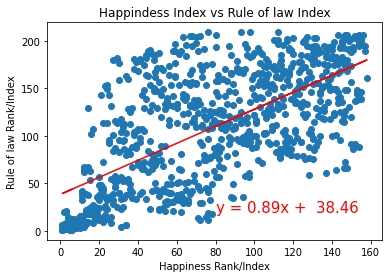

In [32]:
regressvalues=LawRuleCombinedData['Rank_happiness']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happindess Index vs Rule of law Index')
plt.xlabel('Happiness Rank/Index')
plt.ylabel('Rule of law Rank/Index')
plt.scatter(LawRuleCombinedData['Rank_happiness'],LawRuleCombinedData['Rank_rlr']) # Scatter Plot
plt.plot(LawRuleCombinedData['Rank_happiness'],regressvalues,'red') # Linear line
plt.annotate(line_eq,(80,20),fontsize=15,color='red') #print euqation for Linear line.
plt.show()
# Looks like there is a moderately positive realtionship between Rule of law and happiness ranking 

In [33]:
#Create a Political stability Dataset using pvr metric from the above(df) dataset
PoliticalStability=df[['countryname','year','pvr']].sort_values(by=['year','pvr'],ascending=(True,False))
PoliticalStability.reset_index(inplace=True,drop=True)

In [34]:
len(PoliticalStability)

1284

In [35]:
#Drop Nan values from the dataset
PoliticalStability.dropna(axis=0,how='any',inplace=True)

In [36]:
len(PoliticalStability)

1272

In [37]:
#Rank based on the Political stability percentile rank values
PoliticalStability['Rank']=PoliticalStability.groupby('year')['pvr'].rank(ascending=False,method='min')

In [38]:
#Rename column as per Happiness data set
PoliticalStability.rename(columns=({'countryname':'Country','year':'Year'}),inplace=True)

In [39]:
PoliticalStability.head()

,Country,Year,pvr,Rank
0,Greenland,2015,100.000000,1.0
1,"Jersey, Channel Islands",2015,99.523811,2.0
2,New Zealand,2015,99.047623,3.0
3,Liechtenstein,2015,98.571426,4.0
4,Luxembourg,2015,98.095238,5.0


In [40]:
#Combine political stability with Happiness Data
StabilityCombinedData=pd.merge(PoliticalStability,HappinessData,on=['Country','Year'],suffixes=('_PoliticalStability','_happiness'))
StabilityCombinedData.head()

,Country,Year,pvr,Rank_PoliticalStability,Score,Rank_happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,New Zealand,2015,99.047623,3.0,7.286,9,10.408683,0.940631,71.542191,0.922873,0.307064,0.286466
1,Luxembourg,2015,98.095238,5.0,6.946,17,11.370514,0.898688,71.924210,0.900537,0.059814,0.367548
2,Switzerland,2015,96.666664,8.0,7.587,1,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
3,Singapore,2015,96.190475,9.0,6.798,24,11.241599,0.815001,75.765495,0.830982,0.098821,0.186956
4,Iceland,2015,95.714287,10.0,7.561,2,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834


In [41]:
len(StabilityCombinedData)

881

In [71]:
#Calculate regression model
model=linregress(StabilityCombinedData['Rank_happiness'],StabilityCombinedData['Rank_PoliticalStability'])
model

LinregressResult(slope=0.7490352098339129, intercept=62.240661203911095, rvalue=0.5867947488387576, pvalue=1.2421013513378581e-82, stderr=0.03486300916504324, intercept_stderr=3.1323315248771384)

The r-value is: 0.43881404813265384


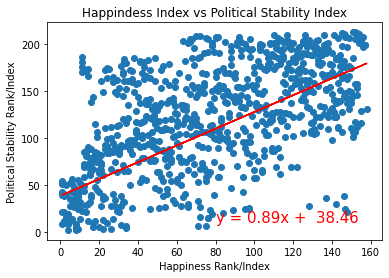

In [44]:
regressvalues=StabilityCombinedData['Rank_happiness']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happindess Index vs Political Stability Index')
plt.xlabel('Happiness Rank/Index')
plt.ylabel('Political Stability Rank/Index')
#Scatter Plot
plt.scatter(StabilityCombinedData['Rank_happiness'],StabilityCombinedData['Rank_PoliticalStability'])
plt.plot(StabilityCombinedData['Rank_happiness'],regressvalues,'red')
plt.annotate(line_eq,(80,10),fontsize=15,color='red')
plt.show()
# Looks like there is a moderately positive realtionship between Political stability and happiness 

In [46]:
#ccr is corruption control index. High CCR means lowest corruption
##Create a Corruption Dataset using pvr metric from the above(df) dataset
CorruptionData=df[['countryname','year','ccr']].sort_values(by=['year','ccr'],ascending=(True,False))
CorruptionData.reset_index(inplace=True,drop=True)
#Drop NaN values
CorruptionData.dropna(axis=0,how='any',inplace=True)

In [47]:
len(CorruptionData)

1254

In [48]:
#Rank based on ccr i.e. percentile rank
CorruptionData['Rank']=CorruptionData.groupby('year')['ccr'].rank(ascending=False,method='min')
CorruptionData.rename(columns=({'countryname':'Country','year':'Year'}),inplace=True)
CorruptionData.head()

,Country,Year,ccr,Rank
0,New Zealand,2015,100.000000,1.0
1,Finland,2015,99.519234,2.0
2,Norway,2015,99.038460,3.0
3,Denmark,2015,98.557693,4.0
4,Sweden,2015,98.076920,5.0


In [49]:
#Merge with Happiness Data
CombinedCorruptionData=pd.merge(CorruptionData,HappinessData,on=['Country','Year'],suffixes=('_CorruptionControl','_happiness'))
CombinedCorruptionData.head()

,Country,Year,ccr,Rank_CorruptionControl,Score,Rank_happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,New Zealand,2015,100.000000,1.0,7.286,9,10.408683,0.940631,71.542191,0.922873,0.307064,0.286466
1,Finland,2015,99.519234,2.0,7.406,6,10.531513,0.940039,70.846245,0.925070,0.000338,0.310990
2,Norway,2015,99.038460,3.0,7.522,4,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
3,Denmark,2015,98.557693,4.0,7.527,3,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
4,Sweden,2015,98.076920,5.0,7.364,8,10.658623,0.927801,71.632347,0.942244,0.164320,0.271875


In [50]:
#Calculate regression model
model=linregress(CombinedCorruptionData['Rank_happiness'],CombinedCorruptionData['Rank_CorruptionControl'])
model

LinregressResult(slope=0.8751128470253638, intercept=42.10474194365527, rvalue=0.6470315394306472, pvalue=1.2264084499658157e-105, stderr=0.03478268305587715, intercept_stderr=3.125114477065214)

The r-value is: 0.41864981301799314


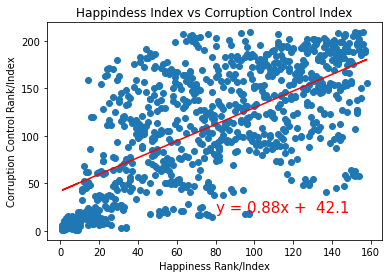

In [51]:
regressvalues=CombinedCorruptionData['Rank_happiness']*model[0]+model[1] #Calculate Linear Regression
line_eq= f"y = {str(round(model[0],2))}x +  {str(round(model[1],2))}"
print(f"The r-value is: {model[2]**2}") #Print Rvalue
plt.title('Happindess Index vs Corruption Control Index')
plt.xlabel('Happiness Rank/Index')
plt.ylabel('Corruption Control Rank/Index')
plt.scatter(CombinedCorruptionData['Rank_happiness'],CombinedCorruptionData['Rank_CorruptionControl'])
plt.plot(CombinedCorruptionData['Rank_happiness'],regressvalues,'red')
plt.annotate(line_eq,(80,20),fontsize=15,color='red')
plt.show()
#  Looks like there is a moderately positive realtionship between Corruption control and happiness 